## Verify single slow mode excited by Legevin antenna in agk

###### $k_\perp\rho_p = 0.1$, $\beta_p = 1.0$

In [12]:
import numpy as np
from py_vlasov.follow_parameter import change_angle, change_beta, change_k, change_tetp
from py_vlasov.transport_ratios import input_gen, transport_ratios
import matplotlib.pyplot as plt
import scipy.optimize
%matplotlib inline

#### Jason's 2012 ApJ variance anisotropy

In [25]:
def f_k(kp):
    kz = 10**(-4/3) * kp**(2/3)
    return np.sqrt(kp**2 + kz**2)
k = 0.1
kp = scipy.optimize.brenth(lambda kp: f_k(kp) - k, 0.05, 0.1)
kz = np.sqrt(k**2 - kp**2)
print(kz)
print(np.arctan(kp/kz) * 180. / np.pi)

0.00996677752855
84.2799601713


In [26]:
#---------------#
# Rotate angle  #
#---------------#
k = 0.1
theta = 85
beta = 0.2
tetp = 1
method = 'numpy'
mratio = 1836
n = 10
aol = 1/5000
"-------------------"
target_angle = 84.3
freq = 0.01190802-0.00635779j # slow mode
#freq = 1.95444741e-02 -6.32084029e-06j # Alfven mode
param = (k, theta, beta, tetp, method, mratio, n, aol)
num = 50
show_plot = True
def follow_angle_fn(prev_freq, prev_angle, cur_angle):
    cos_prev = np.cos(prev_angle * np.pi/180)
    cos_cur = np.cos(cur_angle * np.pi/180)
    return prev_freq * cos_cur/cos_prev

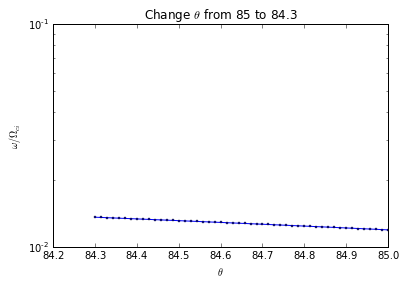

In [27]:
freq_angle = change_angle(freq, param, target_angle, num, follow_angle_fn, show_plot=True)

In [28]:
#---------------#
# increase beta #
#---------------#
k = 0.1
theta = target_angle
"-------------------"
target_beta = 1.0
freq = freq_angle
param = (k, theta, beta, tetp, method, mratio, n, aol)
num = 20

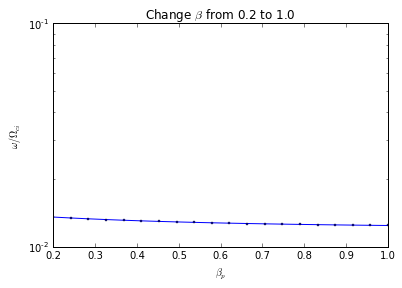

In [29]:
freq_beta = change_beta(freq, param, target_beta, num, show_plot=True)

In [30]:
theta_rad = np.pi * target_angle/180
kperp = k * np.sin(theta_rad)
kpar = k * np.cos(theta_rad)
inp = input_gen(freq_beta, kperp, kpar, target_beta, tetp)
res = transport_ratios(inp, True);

eigen E = [ 0.48+0.15j -0.00-1.j    0.07+0.04j]
p_e_b0 = -0.48-0.15j
p_b_b0 = 0.22+0.3j
p_b_k = 16-22j
c_bb = 0.88
helicy = 0.043
E_L/E_tot = 0.2
compressibility = [ 7.06  7.06]
parallel compressibility = [-2.67-0.1j -2.67-0.1j]
cross helicty = [-0.29  0.21]


In [31]:
res['c_bb'] * np.tan(target_angle * np.pi/180.)**2

88.023347936201546